In [2]:
from ximea import xiapi
from PIL import Image
import math
from matplotlib import pyplot as plt

%matplotlib widget

In [32]:
def open_camera():
    # open camera
    cam = xiapi.Camera()
    cam.open_device()
    img = xiapi.Image()
    return cam, img


def set_parameters(
    cam, aperture=11, exposure=2500, framerate=350, width=3008, height=3008
):
    cam.disable_aeag()
    cam.enable_lens_mode()
    cam.set_lens_aperture_value(aperture)

    print(f"Aperture : {cam.get_lens_aperture_value().__round__(1)}")

    full_width = 4704
    full_height = 3424

    cam.set_height(height)
    cam.set_width(width)

    offset_x = (full_width - width) // 2
    offset_x = math.ceil(offset_x / 32) * 32
    print(f"Offset x: {offset_x}")

    offset_y = (full_height - height) // 2
    offset_y = math.ceil(offset_y / 32) * 32
    print(f"Offset y: {offset_y}")

    cam.set_offsetX(offset_x)
    cam.set_offsetY(offset_y)

    current_width = cam.get_width()
    current_height = cam.get_height()

    print(f"Current resolution: {current_width}x{current_height}")

    cam.set_exposure(exposure)
    cam.set_acq_timing_mode("XI_ACQ_TIMING_MODE_FRAME_RATE_LIMIT")
    cam.set_framerate(framerate)


def grab_image(cam, img, filename):
    try:
        cam.start_acquisition()
    except:
        pass

    for _ in range(10):
        cam.get_image(img)
        frame = img.get_image_data_numpy()

    image = Image.fromarray(frame)

    # draw image to canvas
    fig, ax = plt.subplots(figsize=(30, 30))
    ax.imshow(image, cmap="gray")

    ax.axis("off")
    plt.show()
    image.save(f"focus_calibration/{filename}.jpg")
    cam.stop_acquisition()

In [23]:
cam, img = open_camera()

xiAPI: ---- xiOpenDevice API:V4.27.31.00 started ----
xiAPI: EAL_IF_xiFAPI_Top::InitializeDevice sn:BLMID2407000 name:CB160MG-LX-X8G3
xiAPI: Bandwidth measurement - disabling frame buffer before measurement
xiAPI: Bandwidth measurement - frame buffer disabled OK
xiAPI: XiApiToGentlParamModel Auto bandwidth measurement finished (7036MBps). Safe limit set to: 5628MBps
xiAPI: SAL_Common_SetAcquisitionFrameRate framerate is limited in freerun by bandwidth to 349.5FPS
xiAPI: FGTL_SetParam_to_CAL error from CAL: -10009, addr:x201380
xiAPI: ---- Device opened. Model:CB160MG-LX-X8G3 SN:BLMID2407000 FwF1:22.33 API:V4.27.31.00 ----


In [33]:
set_parameters(cam)

Aperture : 11.0
Offset x: 864
Offset y: 224
Current resolution: 3008x3008


In [36]:
lens_focus_move = 100
cam.set_lens_focus_movement_value(lens_focus_move)
cam.set_lens_focus_move(lens_focus_move)

xiAPI: xiFAPI_Device::AllocateBuffers Allocating buffers. Count:59 OneBuff:8868 KiB All:512 MiB Frm:x1080001


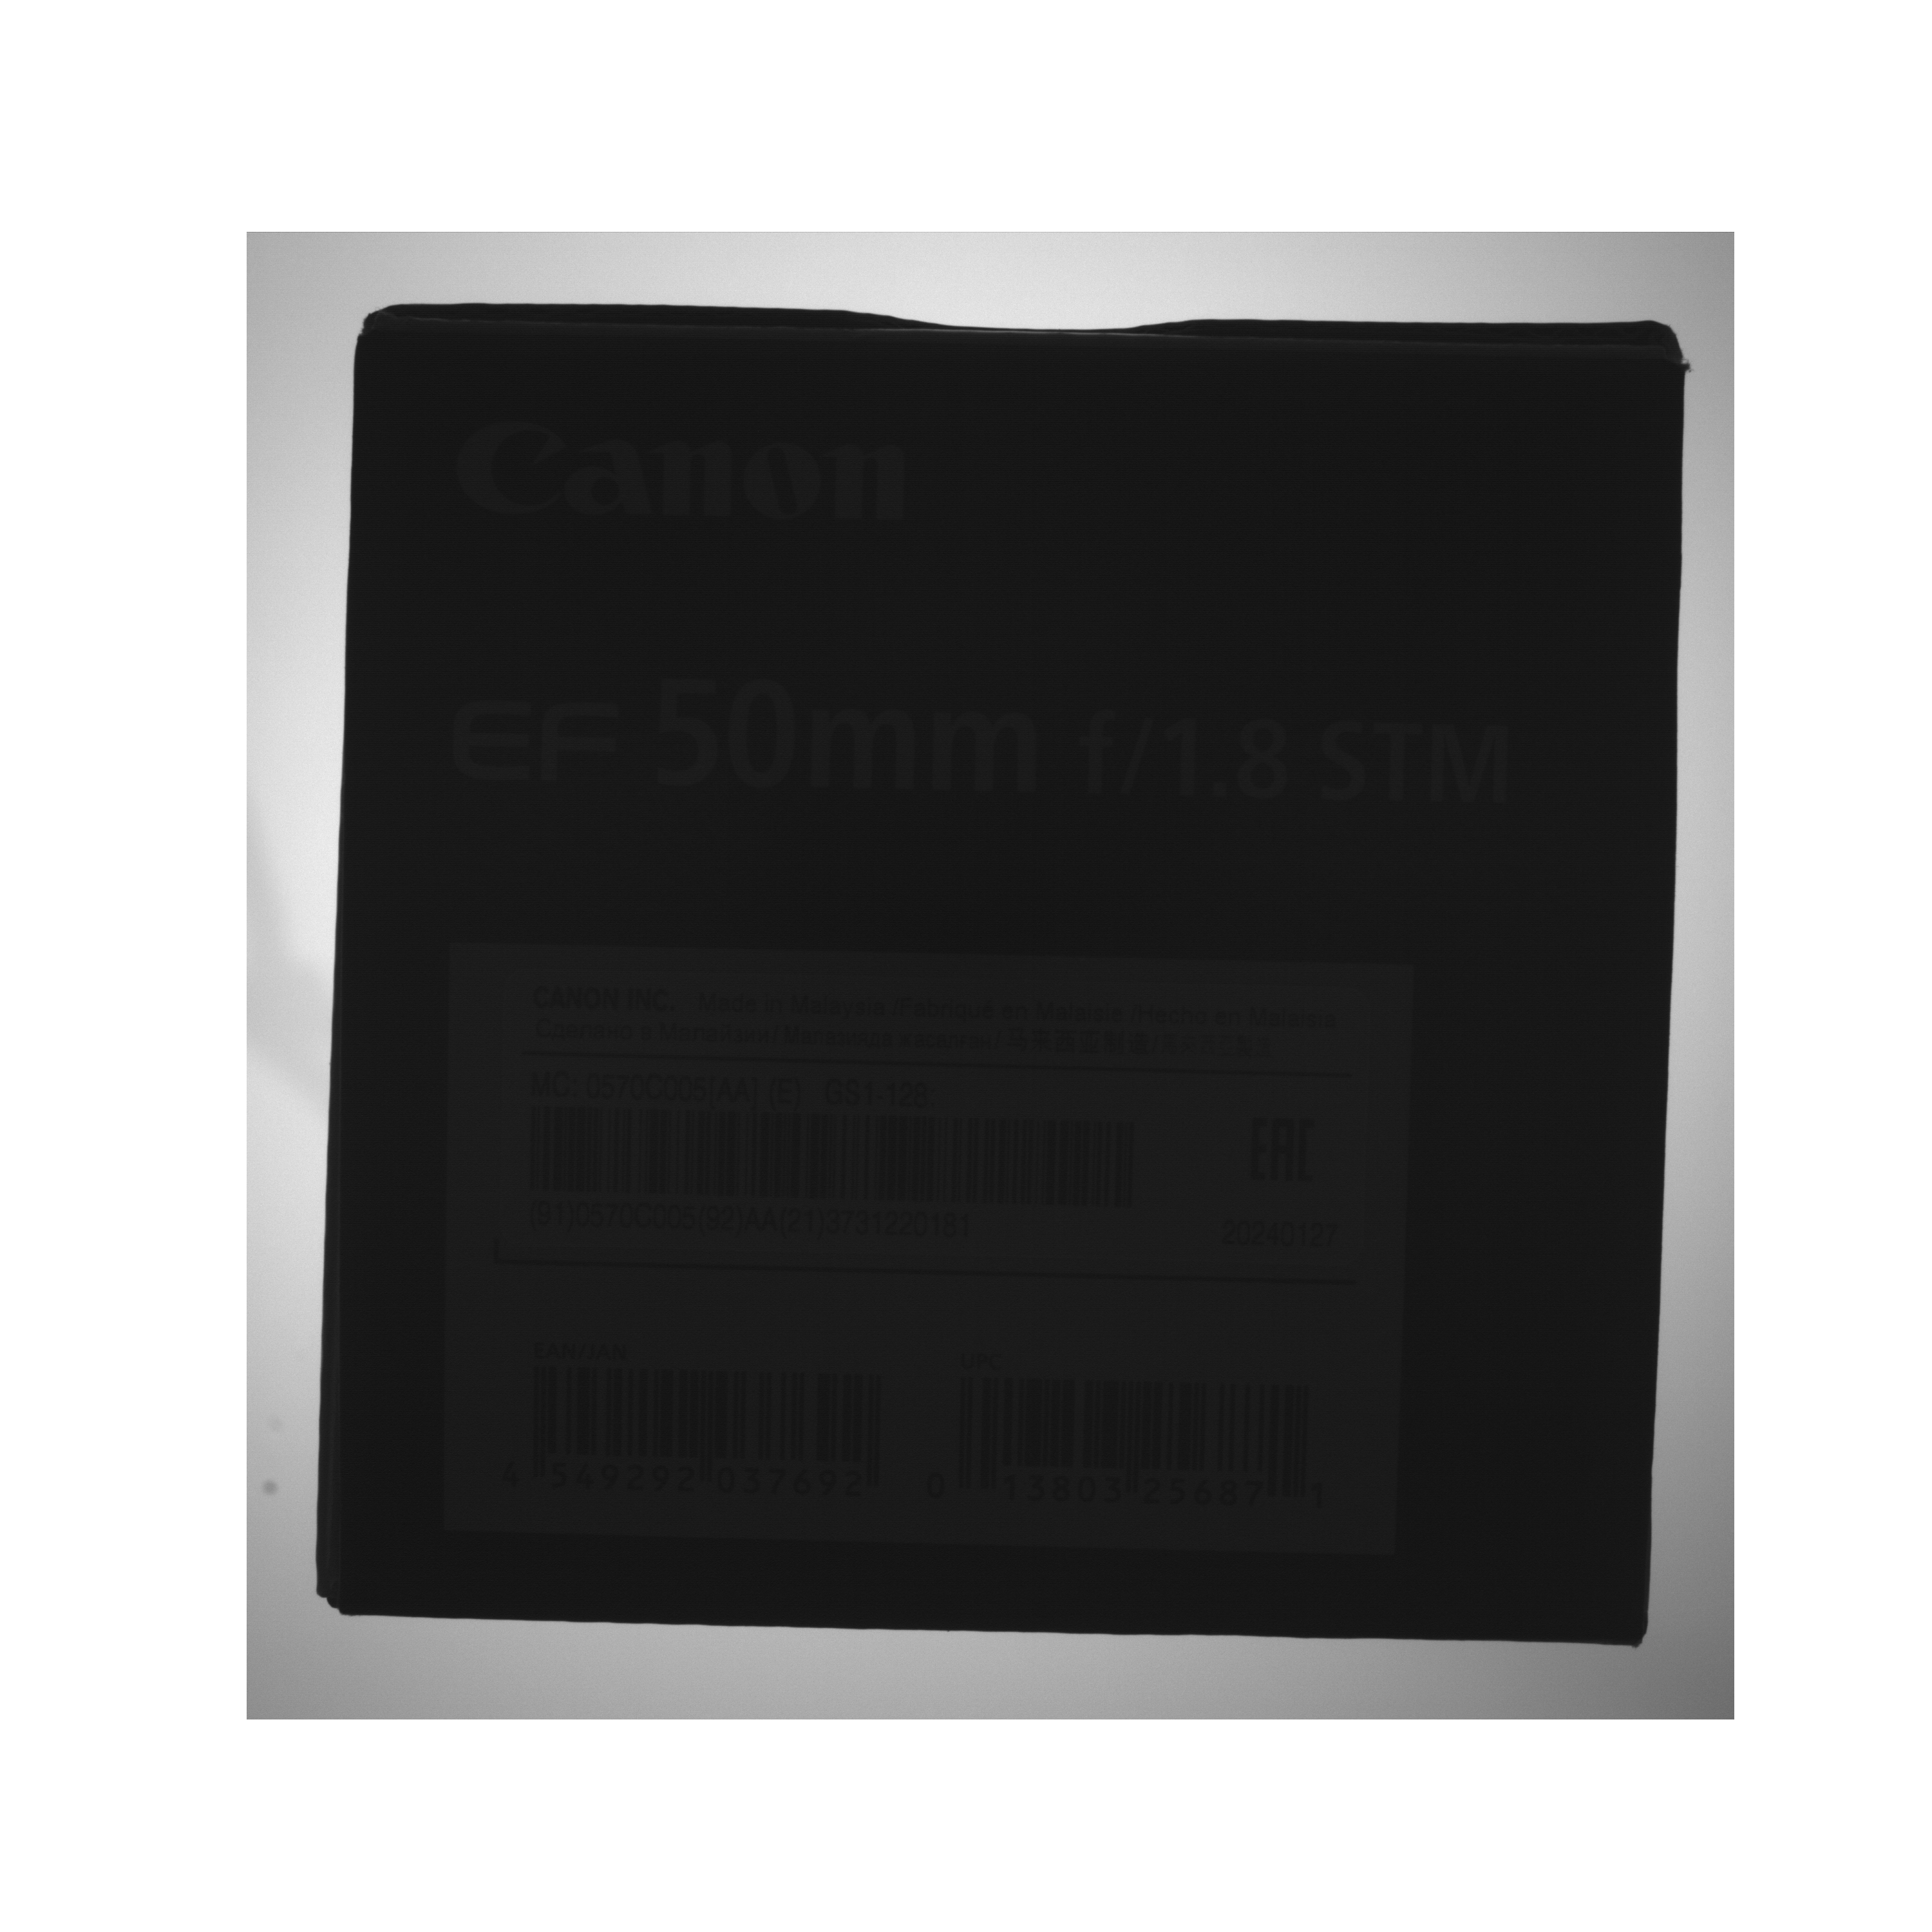

In [37]:
grab_image(cam, img, f"{lens_focus_move}_15cm")

In [22]:
cam.close_device()

xiAPI: xiCloseDevice
xiAPI: EAL_IF_FGenTL::CloseDeviceHandler Warning: Lens are enabled. Disabling.
